In [1]:
import tensorflow as tf 
import pandas as pd
from keras.utils import to_categorical
import random 
import numpy as py 
import os
import matplotlib.pyplot as plt
import scipy
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix
import seaborn as sns

from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, array_to_img, img_to_array
from tensorflow.keras.models import Sequential 
from glob import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

#SVM
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

In [2]:
MODEL_FILENAME="model_svmnofold.h5"

In [3]:
def my_metrics(y_true, y_pred):
    accuracy=accuracy_score(y_true, y_pred)
    precision=precision_score(y_true, y_pred,average='weighted')
    f1Score=f1_score(y_true, y_pred, average='weighted') 
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("f1Score : {}".format(f1Score))
    cm=confusion_matrix(y_true, y_pred)
    print(cm)
#     from sklearn.metrics import plot_confusion_matrix
#     plot_confusion_matrix(cm, normalize=False,cmap=plt.cm.Blues)
    # Classification Report
    from sklearn.metrics import classification_report
    print(classification_report(y_true, y_pred))
    return accuracy, precision, f1Score

In [4]:
#importing dataset
# Define Constants by re-sizing all the images
img_rows, img_cols =  224, 224   #input image dimensions

train_path = 'C:/Users/Hannah/Documents/FYP/testsplit/augmentation/train(aug)'
validation_path = 'C:/Users/Hannah/Documents/FYP/testsplit/augmentation/validation(aug)'
test_path = 'C:/Users/Hannah/Documents/FYP/testsplit/test'

In [5]:
base_model=VGG16(input_shape=(img_rows, img_cols,3), weights='imagenet', include_top=False)
    
for layer in base_model.layers:
    layer.trainable = False
    
x =Flatten()(base_model.output)
x =Dense(32, activation='relu')(x)
x =Dense(32, activation='relu')(x)
# x =Dropout(0.25)(x)
x =BatchNormalization()(x)
x =Dense(10,kernel_regularizer = l2(0.01),activation= 'softmax')(x)
    
model=Model(inputs=base_model.input, outputs=x)
    
optimizer='Adam'
loss='squared_hinge'
    
model.compile(optimizer=optimizer,
                loss=loss,
                metrics=["accuracy"])

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [6]:
# learning rate
batch_size = 16
epoch=55
train_datagen = ImageDataGenerator(
                      rescale=1./255,
                      zoom_range=0.20,
                      shear_range = 0.2,
                      horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale=1./255)
    
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_path,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical') 

history=model.fit(train_generator,validation_data=validation_generator,
                                epochs=epoch,steps_per_epoch=len(train_generator),
                                validation_steps=len(validation_generator),verbose=1)

Found 29030 images belonging to 10 classes.
Found 8705 images belonging to 10 classes.
Epoch 1/55
1815/1815 [==============================] - 305s 162ms/step - loss: 1.0577 - accuracy: 0.7073 - val_loss: 1.0104 - val_accuracy: 0.7937
Epoch 2/55
1815/1815 [==============================] - 233s 128ms/step - loss: 1.0031 - accuracy: 0.8108 - val_loss: 0.9988 - val_accuracy: 0.7945
Epoch 3/55
1815/1815 [==============================] - 235s 129ms/step - loss: 0.9881 - accuracy: 0.8293 - val_loss: 1.0136 - val_accuracy: 0.7410
Epoch 4/55
1815/1815 [==============================] - 236s 130ms/step - loss: 0.9784 - accuracy: 0.8412 - val_loss: 0.9855 - val_accuracy: 0.8107
Epoch 5/55
1815/1815 [==============================] - 240s 132ms/step - loss: 0.9718 - accuracy: 0.8497 - val_loss: 0.9898 - val_accuracy: 0.7921
Epoch 6/55
1815/1815 [==============================] - 239s 132ms/step - loss: 0.9680 - accuracy: 0.8546 - val_loss: 0.9870 - val_accuracy: 0.7943
Epoch 7/55
1815/1815 [===

1815/1815 [==============================] - 258s 142ms/step - loss: 0.9231 - accuracy: 0.9549 - val_loss: 0.9472 - val_accuracy: 0.8871


In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
x = range(1, len(acc) + 1)

print("Training Accuracy: %.2f" % acc[-1])
print("Training Loss: %.2f" % loss[-1])
print("Validation Accuracy: %.2f" % val_acc[-1])
print("Validation Loss: %.2f" % val_loss[-1] + '\n\n')

Training Accuracy: 0.95
Training Loss: 0.92
Validation Accuracy: 0.89
Validation Loss: 0.95




In [9]:
y_pred=model.predict(validation_generator,train_generator)
y_pred

array([[6.4857926e-07, 9.3570907e-06, 6.6054628e-05, ..., 1.3761291e-03,
        2.5843201e-02, 1.1877900e-02],
       [8.9205059e-07, 6.8837169e-10, 4.6363907e-06, ..., 9.9999130e-01,
        2.7166172e-06, 1.8076500e-09],
       [9.6147777e-12, 1.9931126e-14, 9.9754088e-15, ..., 1.5696884e-09,
        7.3682833e-07, 1.8268393e-06],
       ...,
       [6.2958927e-09, 1.0437657e-10, 4.2196311e-06, ..., 9.0803674e-08,
        1.6487724e-05, 1.9310036e-08],
       [3.4105003e-07, 4.5488335e-12, 9.2452324e-10, ..., 9.9995387e-01,
        6.8228314e-07, 5.2299715e-10],
       [4.0138545e-07, 3.3527451e-14, 2.6459408e-09, ..., 9.9994588e-01,
        8.5832180e-06, 1.0379060e-09]], dtype=float32)

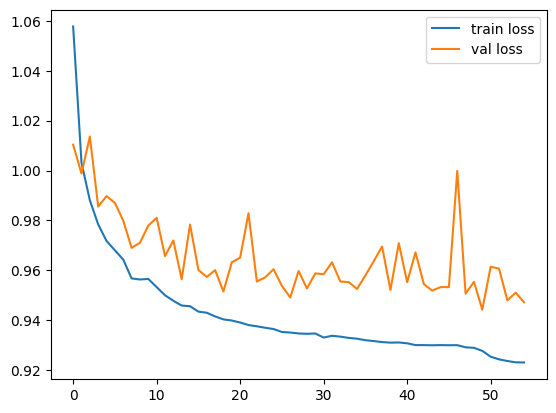

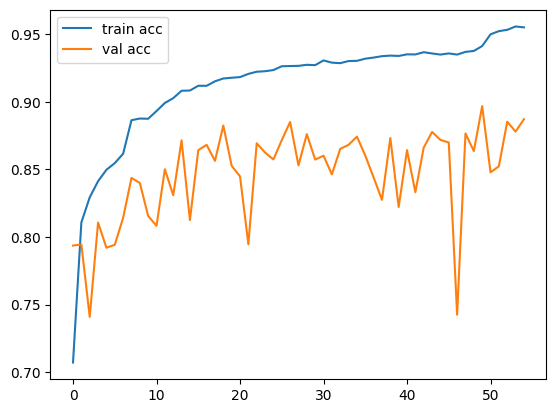

In [10]:
import matplotlib.pyplot as plt
    # Plot the Loss and Accuracy
    # Loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

    # Accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [11]:
print("==============TEST RESULTS============")
test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False) 

predictions = model.predict(test_generator, verbose=1)
yPredictions = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

testAcc,testPrec, testFScore = my_metrics(true_classes, yPredictions)

==============TEST RESULTS============
Found 2902 images belonging to 10 classes.
182/182 [==============================] - 8s 44ms/step
Accuracy  : 0.801171605789111
Precision : 0.8496999271286422
f1Score : 0.7998973553562608
[[198   0   5   0  14  11  79   5   0  28]
 [  8  45  35   4   6  24  29   1   1   7]
 [  0   1 263   2   1   7  22   0   0   9]
 [  0   0   4  96   2  22   5   0   9  14]
 [  0   0   3   3 224  17  21   0   9   6]
 [  0   0   0   0   0 258   5   0   1   4]
 [  0   0   1   0   0  40 178   0   0   5]
 [  4   0   9   3   0  37  21 776   4   3]
 [  0   0   0   3   0   8   7   0  39   2]
 [  0   0   0   0   0   2   4   0   0 248]]
              precision    recall  f1-score   support

           0       0.94      0.58      0.72       340
           1       0.98      0.28      0.44       160
           2       0.82      0.86      0.84       305
           3       0.86      0.63      0.73       152
           4       0.91      0.79      0.85       283
           5    

In [12]:
model.save(MODEL_FILENAME)